# PROJETO INSIDERS CLUSTERING

# PLANEJAMENTO DA SOLUÇÃO

## Input - Entrada

1. Problema de Negócio

 - Selecionar os clientes mais valiosos para integrar um programa de Fidelização;
 
 
2. Conjunto de Dados

 - Vendas de um e-commerce online, durante o período de um ano.

## Output - Saída

1. A indicação das pessoas que farão parte do programa de Insiders:

  - Lista com o id_cliente e a classe se pertence ou não ao grupo de insiders.
  
  
2. Relatório com as respostas das perguntas de negócio:

  - Quem são as pessoas elegíveis para participar do programa de Insiders ?
  - Quantos clientes farão parte do grupo?
  - Quais as principais características desses clientes ?
  - Qual a porcentagem de contribuição do faturamento, vinda do Insiders ?
  - Qual a expectativa de faturamento desse grupo para os próximos meses ?
  - Quais as condições para uma pessoa ser elegível ao Insiders ?
  - Quais as condições para uma pessoa ser removida do Insiders ?
  - Qual a garantia que o programa Insiders é melhor que o restante da base ?
  - Quais ações o time de marketing pode realizar para aumentar o faturamento?

## Tasks - Tarefas

1. Quem são as pessoas elegíveis para participar do programa de Insiders ?

  - O que é ser elegível? O que são clientes de maior "valor"?
  - Avaliar clientes em relação ao
    - Faturamento: 
      - Alto ticket médio;
      - Alto LTV; 
      - Baixa recência; 
      - Alto basket size;
      - Baixa probabilidade de churn;
      - Alta propensão de compra.
       
    - Custo:  
      - Baixa taxa de devolução.
           
    - Experiência de compra:  
      - Média alta das avaliações.

2. Quantos clientes farão parte do grupo?

  - Número total de clientes;
  - Representatividade do grupo Insiders.
  

3. Quais as principais características desses clientes?

  - Características do cliente:
    - Idade;
    - Localização;
    - Gênero.
    
   - Características do consumo:
    - Atributos da clusterização.


4. Qual a porcentagem de contribuição do faturamento, vinda do Insiders?

  - Faturamento total do ano;
  - Faturamento vindo dos insiders.


5. Qual a expectativa de faturamento desse grupo para os próximos meses?

  - LTV do grupo Insiders;
  - Análise de Cohort.  


6. Quais as condições para uma pessoa ser elegível ao Insiders?

  - Definir periodicidade de execução do modelo;
  - A pessoa precisa ser similar ou parecido com o grupo Insiders.
  

7. Quais as condições para uma pessoa ser removida do Insiders?

  - Definir a periodicidade;
  - A pessoa precisa ser dissimilar ou não parecido com o grupo Insiders.


8. Qual a garantia que o programa Insiders é melhor que o restante da base?

  - Teste A/B;
  - Teste A/B Bayesiano;
  - Teste de hipóteses.


9. Quais ações o time de marketing pode realizar para aumentar o faturamento?

  - Desconto;
  - Preferência de compra;
  - Frete grátis.

# 0.0 IMPORTAÇÕES

## 0.1 Bibliotecas

In [1]:
import pandas                as pd
import numpy                 as np
import matplotlib.pyplot     as plt
import seaborn               as sns

from sklearn import cluster  as c


sns.set()

## 0.2 Funções de suporte

## 0.3 Dataset

In [5]:
# carregando os dados

df_raw = pd.read_csv('Data/Ecommerce.csv', encoding='iso-8859-1')

# excluindo variável irrelevante

df_raw.drop(columns=['Unnamed: 8'], axis=1, inplace=True)

In [6]:
df_raw.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29-Nov-16,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,29-Nov-16,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,29-Nov-16,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,29-Nov-16,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,29-Nov-16,3.39,17850.0,United Kingdom


# 1.0 DESCRIÇÃO DOS DADOS

In [7]:
df1 = df_raw.copy()

## 1.1 Renomear colunas

In [8]:
cols_new = ['invoice_no', 'stock_code', 'description', 'quantity', 'invoice_date', 'unit_price', 'customer_id', 'country']

df1.columns = cols_new

## 1.2 Data dimensions

In [9]:
print('Número de observações: {}'.format(df1.shape[0]))
print('Número de variáveis: {}'.format(df1.shape[1]))

Número de observações: 541909
Número de variáveis: 8


## 1.3 Tipagem dos dados

In [10]:
df1.dtypes

invoice_no       object
stock_code       object
description      object
quantity          int64
invoice_date     object
unit_price      float64
customer_id     float64
country          object
dtype: object

## 1.4 Verificando dados faltantes

In [11]:
df1.isna().sum()

invoice_no           0
stock_code           0
description       1454
quantity             0
invoice_date         0
unit_price           0
customer_id     135080
country              0
dtype: int64

## 1.5 Substituindo dados faltantes

In [12]:
df1.dropna(subset=['description', 'customer_id'], inplace=True)

print('Observações removidas: {:.2f}%'.format((1-(df1.shape[0]/df_raw.shape[0]))*100))

Observações removidas: 24.93%


In [13]:
df1.isna().sum()

invoice_no      0
stock_code      0
description     0
quantity        0
invoice_date    0
unit_price      0
customer_id     0
country         0
dtype: int64

## 1.6 Modificando a tipagem de dados

In [14]:
# invoice date

df1['invoice_date'] = pd.to_datetime(df1['invoice_date'], format='%d-%b-%y')

# customer id

df1['customer_id'] = df1['customer_id'].astype(int)

In [15]:
df1.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2016-11-29,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2016-11-29,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2016-11-29,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2016-11-29,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2016-11-29,3.39,17850,United Kingdom


## 1.7 Estatatística descritiva

# 2.0 FEATURE ENGINEERING

In [16]:
df2 = df1.copy()

## 2.1 Criação de feature

In [17]:
# tabela de referencia

df_ref = df2.drop(['invoice_no', 'stock_code', 'description', 'quantity',
          'invoice_date', 'unit_price', 'country'
          ], axis=1).drop_duplicates(ignore_index=True)

df_ref.head()

,customer_id
0,17850
1,13047
2,12583
3,13748
4,15100


In [18]:
# gross revenue (faturamento)

df2['gross_revenue'] = df2['quantity'] * df2['unit_price']

df_monetary = df2[['customer_id', 'gross_revenue']].groupby('customer_id').sum().reset_index()

df_ref = pd.merge(df_ref, df_monetary, on='customer_id', how='left')

#######################################################################

# recência 

df_recency = df2[['customer_id', 'invoice_date']].groupby('customer_id').max().reset_index()
df_recency['recency_days'] = (df2['invoice_date'].max() - df_recency['invoice_date']).dt.days
df_recency = df_recency[['customer_id', 'recency_days']].copy()
df_ref = pd.merge(df_ref, df_recency, on='customer_id', how='left')

#######################################################################

# frequency

df_freq = df2[['customer_id', 'invoice_no']].drop_duplicates().groupby('customer_id').count().reset_index()
df_ref = pd.merge(df_ref, df_freq, on='customer_id', how='left')

In [19]:
df_ref

,customer_id,gross_revenue,recency_days,invoice_no
0,17850,5288.63,302,35
1,13047,3079.10,31,18
2,12583,7187.34,2,18
3,13748,948.25,95,5
4,15100,635.10,330,6
...,...,...,...,...
4367,13436,196.89,1,1
4368,15520,343.50,1,1
4369,13298,360.00,1,1
4370,14569,227.39,1,1


# 3.0 FILTRAGEM DE VARIÁVEIS

In [20]:
df3 = df_ref.copy()

# 4.0 ANÁLISE EXPLORATÓRIA DE DADOS

In [21]:
df4 = df3.copy()

# 5.0 PREPARAÇÃO DOS DADOS

In [22]:
df5 = df4.copy()

# 6.0 FEATURE SELECTION

In [23]:
df6 = df5.copy()

# 7.0 HYPERPARAMETER FOR FINE-TUNNING

In [24]:
x = df6.drop(columns=['customer_id'], axis=1)

In [25]:
clusters = [2, 3, 4, 5, 6, 7, 8]

## 7.1 Within-Cluster Sum of Squares (WSS)

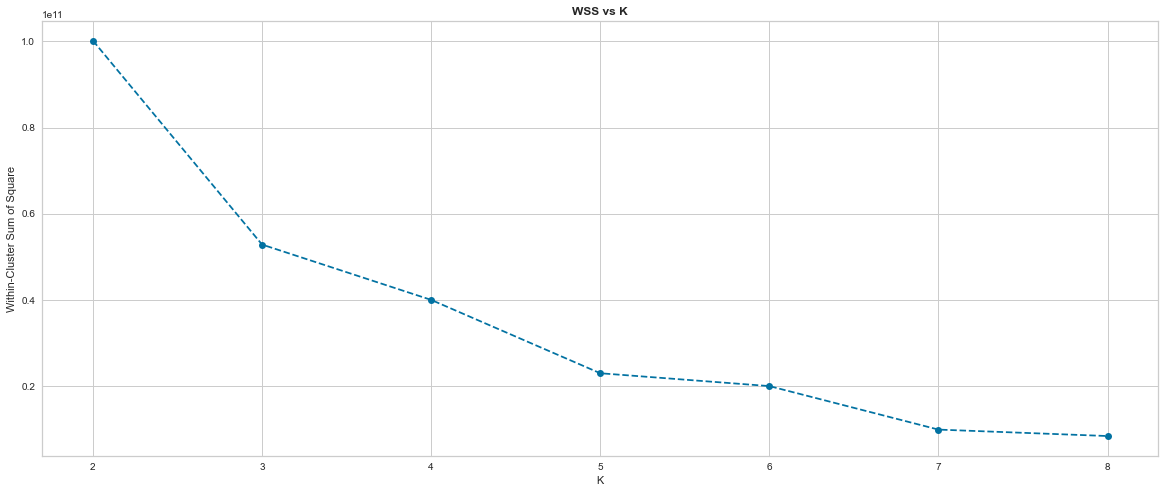

In [26]:
wss = []

for k in clusters:
    
    # model definition
    
    kmeans = c.KMeans(init='random', n_clusters=k, n_init=10, max_iter=300, random_state=42)
    
    # model training
    
    kmeans.fit(x)
    
    # validation 
    
    wss.append(kmeans.inertia_)
    
# plot wss

plt.figure(figsize=(20,8))
plt.plot(clusters, wss, linestyle='--', marker='o', color='b')
plt.xlabel('K')
plt.ylabel('Within-Cluster Sum of Square')
plt.title('WSS vs K', fontweight='bold');

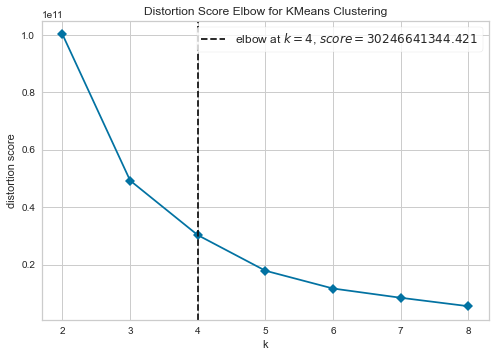

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [30]:
kmeans = KElbowVisualizer(c.KMeans(), k=clusters, timings=False)
kmeans.fit(x)
kmeans.show()